In [761]:
import pylab
import numpy.fft
import scipy.interpolate

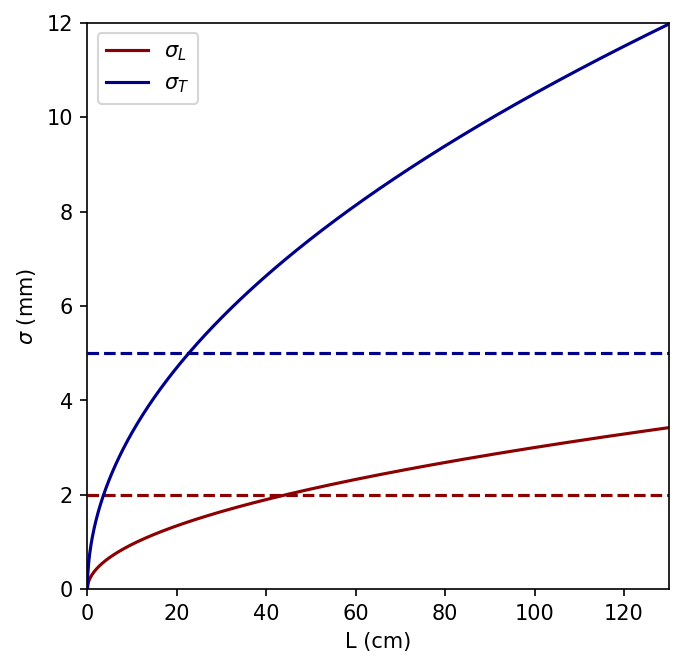

In [755]:
pylab.figure(figsize=(5,5),dpi=150)
Ls=np.arange(0,130,0.1)
sigL=0.3*np.sqrt(Ls)
sigT=3.5*0.3*np.sqrt(Ls)
pylab.plot([0,130],[2,2],'--',color='DarkRed')
pylab.plot([0,130],[5,5],'--',color='DarkBlue')
pylab.plot(Ls,sigL,label=r"$\sigma_L$",color='DarkRed')
pylab.plot(Ls,sigT,label=r"$\sigma_T$",color='DarkBlue')
pylab.xlabel("L (cm)")
pylab.ylabel(r"$\sigma$ (mm)")
pylab.xlim(0,130)
pylab.ylim(0,12)
pylab.legend(loc='upper left')

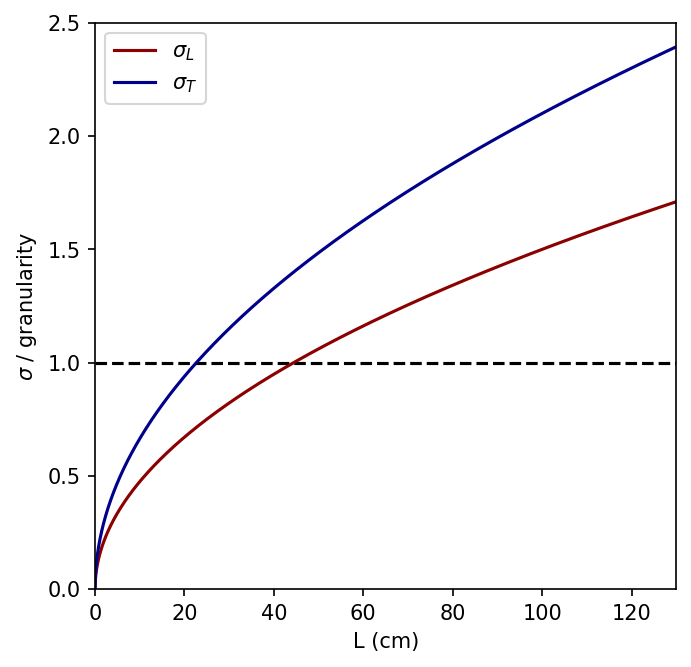

In [759]:
pylab.figure(figsize=(5,5),dpi=150)
Ls=np.arange(0,130,0.1)
sigL=0.3*np.sqrt(Ls)
sigT=3.5*0.3*np.sqrt(Ls)
pylab.plot([0,130],[1,1],'--',color='black')
pylab.plot(Ls,sigL/2,label=r"$\sigma_L$",color='DarkRed')
pylab.plot(Ls,sigT/5,label=r"$\sigma_T$",color='DarkBlue')
pylab.xlabel("L (cm)")
pylab.ylabel(r"$\sigma$ / granularity")
pylab.xlim(0,130)
pylab.ylim(0,2.5)
pylab.legend(loc='upper left')

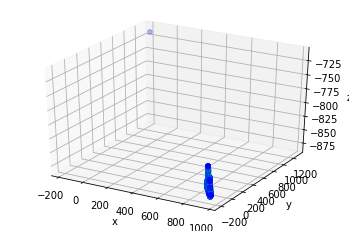

In [385]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# data is in the format that is a list of events 
#[EventNum,Energy,Ihit,Ehit,Xhit,Yhit,Zhit]
# where Ihit,Ehit,Xhit,Yhit,Zhit are
# hit time, energy, X, Y, Z respectivly
Data = np.load("./bb0nu-001.npy")
# this is the first event
fist = Data[1]
fig = plt.figure()
ax = fig.add_subplot( 111, projection = '3d')
normalize = matplotlib.colors.Normalize(vmin = 0, vmax = max(fist[3]))
ax.scatter( fist[4] , fist[5] , fist[6] ,c=fist[3], cmap = 'winter', norm = normalize)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

[]

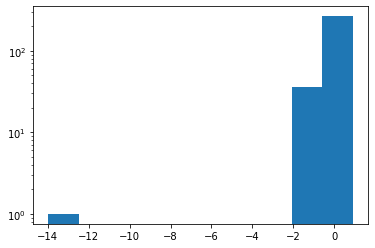

In [378]:
pylab.hist((Data[10][5]-np.mean(Data[10][5]))/np.std(Data[10][5]))
pylab.semilogy()

In [320]:
def ApplyDiffusion(sigL,sigT,lres,tres,dat):
    MaxX=np.max(dat[4])
    MinX=np.min(dat[4])
    MaxY=np.max(dat[5])
    MinY=np.min(dat[5])
    MaxZ=np.max(dat[6])
    MinZ=np.min(dat[6])
    
    XSteps=int((XMax-XMin)/tres)+1
    YSteps=int((XMax-XMin)/tres)+1
    ZSteps=int((XMax-XMin)/lres)+1
    
    
    for i in range(0,len[dat[4]]):
        X=dat[4,i]
        Y=dat[5,i]
        Z=dat[6,i]
        E=dat[3,i]
    

In [325]:

def CountVoxels(dat,lres=2,tres=5):
    MaxX=np.max(dat[1])+5*tres
    MinX=np.min(dat[1])-5*tres
    MaxY=np.max(dat[2])+5*tres
    MinY=np.min(dat[2])-5*tres
    MaxZ=np.max(dat[3])+5*lres
    MinZ=np.min(dat[3])-5*lres
    
    XSteps=int((MaxX-MinX)/tres)+1
    YSteps=int((MaxY-MinY)/tres)+1
    ZSteps=int((MaxZ-MinZ)/lres)+1
    
    return XSteps*YSteps*ZSteps

In [328]:
VoxCounts=[]
for i in range(1,100):
    VoxCounts.append(CountVoxels(Data[i][3:],2,5))

2

In [404]:
def ExtractArray(Data,i):

    return np.array([np.array(Data[i][3],dtype='float'),np.array(Data[i][4],dtype='float'),np.array(Data[i][5],dtype='float'),np.array(Data[i][6],dtype='float')])[:,1:]

In [321]:
def MakeDiffImage(dat,LRat=1,TRat=1,lres=2,tres=5):
    sigL=2*(lres*LRat)**2
    sigT=2*(tres*TRat)**2
    MaxX=np.max(dat[1])+5*tres
    MinX=np.min(dat[1])-5*tres
    MaxY=np.max(dat[2])+5*tres
    MinY=np.min(dat[2])-5*tres
    MaxZ=np.max(dat[3])+5*lres
    MinZ=np.min(dat[3])-5*lres
    
    XSteps=int((MaxX-MinX)/tres)+1
    YSteps=int((MaxY-MinY)/tres)+1
    ZSteps=int((MaxZ-MinZ)/lres)+1
    
    
    XCenters=np.arange(0,XSteps+1)*tres+MinX
    YCenters=np.arange(0,YSteps+1)*tres+MinY
    ZCenters=np.arange(0,ZSteps+1)*lres+MinZ
    
    ImageXZ=np.zeros(shape=(XSteps,ZSteps))
    ImageYZ=np.zeros(shape=(YSteps,ZSteps))
    ImageXY=np.zeros(shape=(XSteps,YSteps))


    for i in range(0,len(dat[0])):
        X=dat[1][i]
        Y=dat[2][i]
        Z=dat[3][i]
        E=dat[0][i]
        for xi in range(0,XSteps):
            for zi in range(0,ZSteps):
                ImageXZ[xi,zi]+=np.exp(-(X-XCenters[xi])**2/sigT2-(Z-ZCenters[zi])**2/sigL2)
        for yi in range(0,YSteps):
            for zi in range(0,ZSteps):
                ImageYZ[yi,zi]+=np.exp(-(Y-YCenters[yi])**2/sigT2-(Z-ZCenters[zi])**2/sigL2)
        for xi in range(0,XSteps):
            for yi in range(0,YSteps):
                ImageXY[xi,yi]+=np.exp(-(X-XCenters[xi])**2/sigT2-(Y-YCenters[yi])**2/sigT2)

    return(ImageXZ,ImageYZ,ImageXY)

In [430]:
def MakeDiffImage3D(dat,LRat=1,TRat=1,lres=2,tres=5,Norm=True):
    sigL2=2*(lres*LRat)**2
    sigT2=2*(tres*TRat)**2
    NormFactor=(2.*3.142)**(-1.5)*(sigL2*sigT2*sigT2/8.)**(-0.5)
    
    MaxX=np.max(dat[1])+5*tres
    MinX=np.min(dat[1])-5*tres
    MaxY=np.max(dat[2])+5*tres
    MinY=np.min(dat[2])-5*tres
    MaxZ=np.max(dat[3])+5*lres
    MinZ=np.min(dat[3])-5*lres
    
    XSteps=int((MaxX-MinX)/tres)+1
    YSteps=int((MaxY-MinY)/tres)+1
    ZSteps=int((MaxZ-MinZ)/lres)+1
    
    print([XSteps,YSteps,ZSteps])
    XCenters=np.arange(0,XSteps+1)*tres+MinX
    YCenters=np.arange(0,YSteps+1)*tres+MinY
    ZCenters=np.arange(0,ZSteps+1)*lres+MinZ
    
    ImageXYZ=np.zeros(shape=(XSteps,YSteps,ZSteps))

    if(Norm):
        NormArray=dat[0]
    else:
        NormArray=np.ones_like(dat[0])
    for i in range(0,len(dat[0])):

        for xi in range(0,XSteps):
            for yi in range(0,YSteps):
                for zi in range(0,ZSteps):

                    exponentX=(dat[1,i]-XCenters[xi])**2/sigT2
                    if(exponentX>9): 
                        continue
                    
                    exponentY=(dat[2,i]-YCenters[yi])**2/sigT2
                    if(exponentY>9): 
                        continue
                    
                    exponentZ=(dat[3,i]-ZCenters[zi])**2/sigL2
                    if(exponentZ>9): 
                        continue                    

                    ImageXYZ[xi,yi,zi]+=dat[0,i]*np.exp(-exponentX-exponentY-exponentZ)

    ImageXYZ*=NormFactor
    return(ImageXYZ,(XCenters,YCenters,ZCenters))

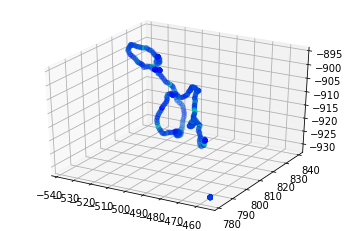

In [645]:
fig = plt.figure()


d1=ExtractArray(Data,3)
ax = fig.add_subplot( 111, projection = '3d')

ax.scatter( d1[1] , d1[2] , d1[3] ,c=d1[0], cmap = 'winter', norm = normalize)



[38, 30, 28]


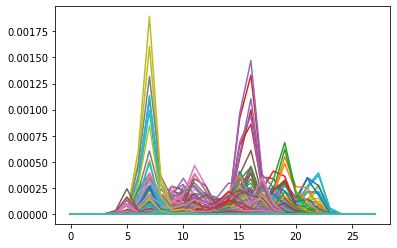

In [647]:
sliceactivity=[]
for i in range(len(ImageXYZ)):
    for j in range(len(ImageXYZ[0])):
        line=ImageXYZ[i,j,:]
        sliceactivity.append(sum(line))
        vars=np.arange(0,len(line))
        pylab.plot(vars,line)

(array([1.023e+03, 3.500e+01, 3.700e+01, 2.400e+01, 6.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 5.000e+00]),
 array([0.        , 0.00033058, 0.00066115, 0.00099173, 0.00132231,
        0.00165288, 0.00198346, 0.00231404, 0.00264461, 0.00297519,
        0.00330577]),
 <a list of 10 Patch objects>)

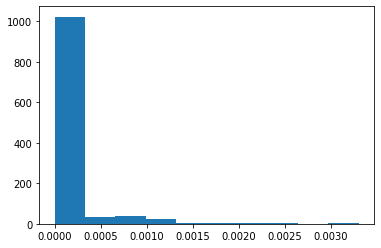

In [568]:
pylab.hist(sliceactivity)

In [569]:
2.*3.14/Freqs

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([         inf, 351.68      , 175.84      , 117.22666667,
        87.92      ,  70.336     ,  58.61333333,  50.24      ,
        43.96      ,  39.07555556,  35.168     ,  31.97090909,
        29.30666667,  27.05230769,  25.12      ])

In [736]:
trueSigL=1.0

In [741]:
ImageXYZ,(XCenters,YCenters,ZCenters)=MakeDiffImage3D(ExtractArray(Data,1),LRat=trueSigL,TRat=1,lres=2,tres=10,Norm=True)

[14, 13, 37]


In [776]:
#pylab.figure(figsize=(5,5),dpi=200)
MeanFFTs=[]
Activities=[]


    
gauswids=np.arange(0.0001, 4, 0.01)
enclosed = np.zeros_like(gauswids)
for i in range(len(ImageXYZ)):
    for j in range(len(ImageXYZ[0])):
        line=ImageXYZ[i,j,:]
        linefft=np.abs(np.fft.rfft(line))
        Freqs=np.fft.rfftfreq(len(line),d=(ZCenters[1]-ZCenters[0]))
        NormFFT=linefft/linefft[0]
        # pylab.plot(Freqs,NormFFT,alpha=0.02,color='blue')
        if(sum(NormFFT)>0):
            MeanFFTs.append(np.sqrt(sum([NormFFT[f]*Freqs[f] for f in range(0,len(NormFFT))])))
            Activities.append(sum(line))
        for gauswidi in range(0,len(gauswids)):
            for r in range(0, int(len(NormFFT)/2)):
                if(NormFFT[r]>np.exp(-0.5*(Freqs[r]/(gauswids[gauswidi]))**2)):
                    enclosed[gauswidi]+=1
enclinterp=scipy.interpolate.interp1d(enclosed/max(enclosed),gauswids)
CrossingPoint=enclinterp(0.05)
print("Z",CrossingPoint)

enclosed = np.zeros_like(gauswids)
for i in range(len(ImageXYZ[0])):
    for j in range(len(ImageXYZ[0][0])):
        line=ImageXYZ[:,i,j]
        linefft=np.abs(np.fft.rfft(line))
        Freqs=np.fft.rfftfreq(len(line),d=(XCenters[1]-XCenters[0]))
        NormFFT=linefft/linefft[0]
        # pylab.plot(Freqs,NormFFT,alpha=0.02,color='blue')
        if(sum(NormFFT)>0):
            MeanFFTs.append(np.sqrt(sum([NormFFT[f]*Freqs[f] for f in range(0,len(NormFFT))])))
            Activities.append(sum(line))
        for gauswidi in range(0,len(gauswids)):
            for r in range(0, int(len(NormFFT)/2)):
                if(NormFFT[r]>np.exp(-0.5*(Freqs[r]/(gauswids[gauswidi]))**2)):
                    enclosed[gauswidi]+=1
enclinterp=scipy.interpolate.interp1d(enclosed/max(enclosed),gauswids)
CrossingPoint=enclinterp(0.05)
print("X",CrossingPoint)




enclosed = np.zeros_like(gauswids)
for i in range(len(ImageXYZ)):
    for j in range(len(ImageXYZ[0][0])):
        line=ImageXYZ[i,:,j]
        linefft=np.abs(np.fft.rfft(line))
        Freqs=np.fft.rfftfreq(len(line),d=(YCenters[1]-YCenters[0]))
        NormFFT=linefft/linefft[0]
        # pylab.plot(Freqs,NormFFT,alpha=0.02,color='blue')
        if(sum(NormFFT)>0):
            MeanFFTs.append(np.sqrt(sum([NormFFT[f]*Freqs[f] for f in range(0,len(NormFFT))])))
            Activities.append(sum(line))
        for gauswidi in range(0,len(gauswids)):
            for r in range(0, int(len(NormFFT)/2)):
                if(NormFFT[r]>np.exp(-0.5*(Freqs[r]/(gauswids[gauswidi]))**2)):
                    enclosed[gauswidi]+=1
enclinterp=scipy.interpolate.interp1d(enclosed/max(enclosed),gauswids)
CrossingPoint=enclinterp(0.05)
print("Y",CrossingPoint)

#pylab.xlabel("Frequency")
#pylab.ylabel("Normalized FFT")
#pylab.xlim(0,max(Freqs))
#pylab.ylim(0,1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Z 0.06926666666666667


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


X 1.2984073770491804


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


Y 1.3021


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(0, 6)

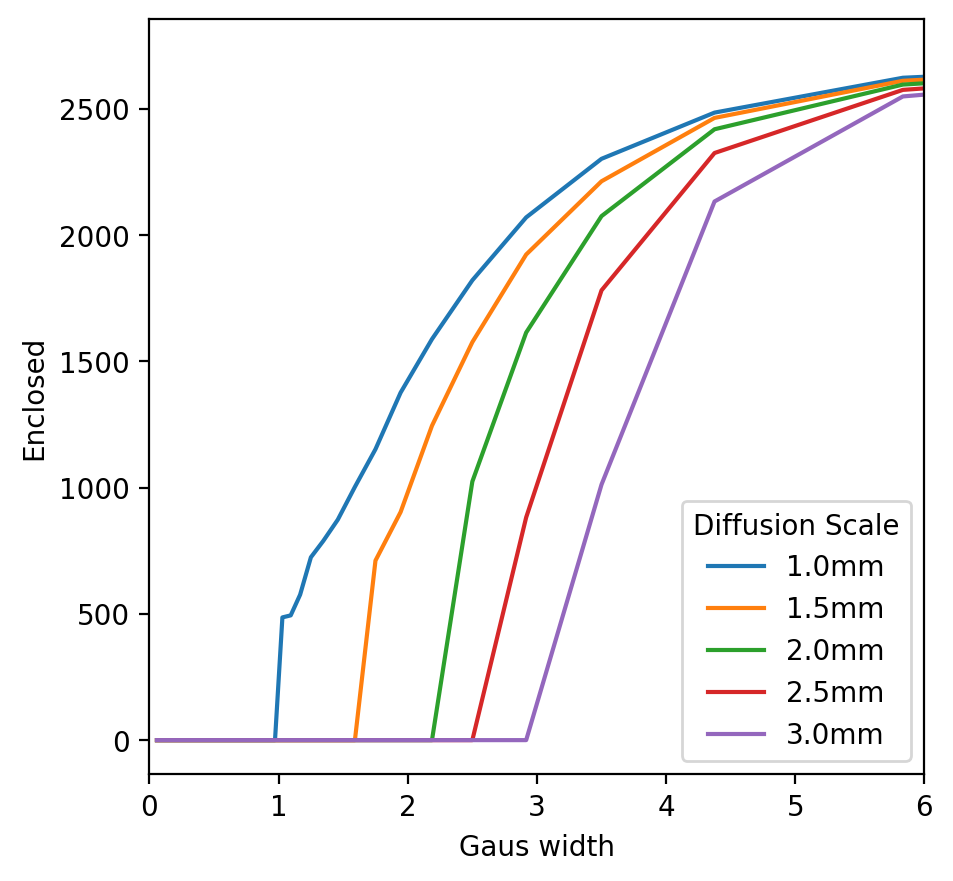

In [735]:
pylab.figure(figsize=(5,5),dpi=200)
plots=[enclosed0p5,enclosed0p75,enclosed1p0,enclosed1p25,enclosed1p5]
labels=[0.5,0.75,1.0,1.25,1.5]
for i in range(0,len(plots)):
    pylab.plot(2.*0.087500/gauswids,plots[i],label=str(labels[i]*2)+str("mm"))
pylab.xlabel("Gaus width")
pylab.ylabel("Enclosed")
pylab.legend(loc='lower right',title='Diffusion Scale')
pylab.plot()
pylab.xlim(0,6)

In [706]:
1.25/(1./0.07)

0.08750000000000001

In [731]:
enclosed1p5=enclosed

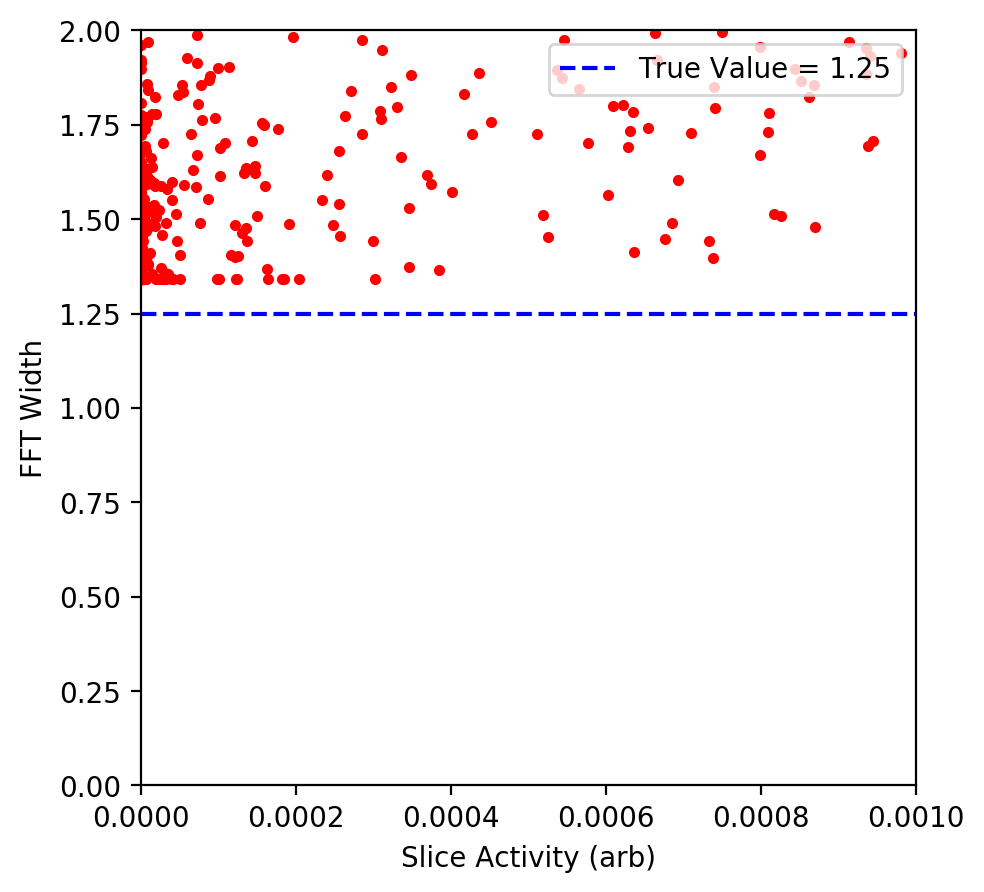

In [679]:
pylab.figure(figsize=(5,5),dpi=200)
pylab.plot(Activities,2./(3.142*np.array(MeanFFTs)),'.',color='red')
pylab.xlabel("Slice Activity (arb)")
pylab.ylabel("FFT Width")
pylab.xlim(0,0.001)
pylab.plot([0,20],[trueSigL,trueSigL],'--',color='blue',label='True Value = '+str(trueSigL))
pylab.ylim(0,2)


pylab.legend(loc='upper right')


In [618]:
h1

(array([12.,  5., 26., 28., 23., 24., 15., 57., 92., 15., 16.,  7., 10.,
         9.,  9.,  5.,  4.,  9.,  8., 11.,  3.,  3.,  5.,  4.,  1.,  1.,
         4.,  1.,  3.,  2.,  4.,  3.,  3.,  4.,  3.,  0.,  4.,  5.,  3.,
         0.,  2.,  2.,  2.,  1.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([0.39462235, 0.4073989 , 0.42017544, 0.43295198, 0.44572852,
        0.45850507, 0.47128161, 0.48405815, 0.49683469, 0.50961124,
        0.52238778, 0.53516432, 0.54794086, 0.56071741, 0.57349395,
        0.58627049, 0.59904703, 0.61182358, 0.62460012, 0.63737666,
        0.6501532 , 0.66292975, 0.67570629, 0.68848283, 0.70125937,
        0.71403592, 0.72681246, 0.739589  , 0.75236554, 0.76514209,
        0.77791863, 0.79069517, 0.80347171, 0.81624826, 0.8290248 ,
        0.84180134, 0.85457788, 0.86735442, 0.88013097, 0.89290751,
        0.90568405, 0.91846059, 0.93123714, 0.94401368, 0.95679022,
        0.96956676, 0.98234331, 0.99511985, 1.00789639, 1.02067293,
        1.03344948]),
 <a list of 50

In [ ]:
)

0.4968346941488479


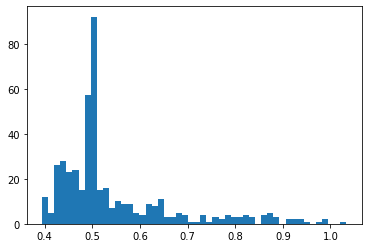

[22, 20, 37]
[24, 36, 30]
[38, 30, 28]
[22, 29, 58]
[24, 20, 52]
[26, 33, 44]
[58, 27, 52]


KeyboardInterrupt: 

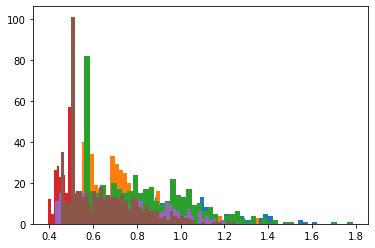

In [635]:
DiffScales=[]
for res in np.arange(0.5,3,0.5):
    DiffScale=[]
    for i in [1,2,3,4,6,7,8,9,10,11]:
        ImageXYZ,(XCenters,YCenters,ZCenters)=MakeDiffImage3D(ExtractArray(Data,i),LRat=res,TRat=1,lres=2,tres=3,Norm=True)
        MeanFFTs=[]
        Activities=[]
        for i in range(len(ImageXYZ)):
            for j in range(len(ImageXYZ[0])):
                line=ImageXYZ[i,j,:]
                if(sum(line)>0):
                    linefft=np.abs(np.fft.rfft(line))
                    Freqs=np.fft.rfftfreq(len(line),d=(ZCenters[1]-ZCenters[0]))
                    NormFFT=linefft/linefft[0]
                    MeanFFTs.append(np.sqrt(sum([NormFFT[f]*Freqs[f] for f in range(0,len(NormFFT))])))
                    Activities.append(sum(line))
        h1=pylab.hist(2./(3.14*np.array(MeanFFTs)),bins=50)
        DiffScale.append((h1[1][np.argmax(h1[0])]))

    DiffScales.append(Diffscale)

In [632]:
line

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

(array([1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.44308678, 0.45191086, 0.46073494, 0.46955901, 0.47838309,
        0.48720717, 0.49603124, 0.50485532, 0.5136794 , 0.52250347,
        0.53132755, 0.54015163, 0.5489757 , 0.55779978, 0.56662386,
        0.57544794, 0.58427201, 0.59309609, 0.60192017, 0.61074424,
        0.61956832, 0.6283924 , 0.63721647, 0.64604055, 0.65486463,
        0.6636887 , 0.67251278, 0.68133686, 0.69016093, 0.69898501,
        0.70780909, 0.71663316, 0.72545724, 0.73428132, 0.74310539,
        0.75192947, 0.76075355, 0.76957763, 0.7784017 , 0.78722578,
        0.79604986, 0.80487393, 0.81369801, 0.82252209, 0.83134616,
        0.84017024, 0.84899432, 0.85781839, 0.86664247, 0.87546655,
        0.88429062]),
 <a list of 50 Patch objects>)

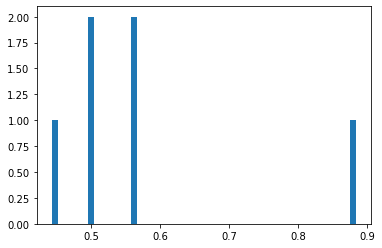

In [640]:
pylab.hist(DiffScale,bins=50)